<table style="border:1px solid black">
    <tbody>
    <tr>
        <td style="text-align: center; vertical-align: middle; border:1px solid black;"><h1>TP<br></h1></td>
        <td style="text-align: center; vertical-align: middle; border:1px solid black;"><h2>1h30<br></h2></td>
        <td style="text-align: center; vertical-align: middle; border:1px solid black;"><h2>Algorithmes sur les 
graphes</h2></td>
        <td style="text-align: center; vertical-align: middle; border:1px solid black;"><h2>Terminale<br></h2></td>
     </tr>
     <tr>
        <th colspan="2" style="text-align: center; vertical-align: middle; border:1px solid black; background-color:white;"><img alt="logoLycée" src="../notebook/TNSI/logoLLG.jpg"></th>
        <td style="text-align: center; vertical-align: middle; border:1px solid black;"><h2>Parcours de labyrinthe<br></h2></td>
        <th style="text-align: center; vertical-align: middle; border:1px solid black; background-color:white;"><img alt="logoNSI" src="../notebook/TNSI/logoTnsi.png"></th> 
    </tr>
    </tbody>
</table>

<img alt="Creative Commons License" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
<br>
<p>Nous allons étudier, à travers ce TP, comment générer un <b>labyrinthe parfait</b> (lorsque deux cases quelconques sont reliées par un seul chemin, pas de cycle, c'est un arbre) comportant largxhaut cases. Nous aborderons ensuite, comment parcourir ce labyrinthe, en utilisant la classe "GraphMa" construite lors des séances sur les Graphes.</p>

<h1>1er partie : génération du labyrinthe</h1>
<p>Nous utilisons la bibliotèque "matplotlib.pyplot" dans le but de tracer un parcours aléatoire comportant larg * haut cases. On part de la case de coordonnée (0, 0), et on avance de case en case jusqu'à remplir toutes les cases.<br>On donne l'exemple ci-dessous, avec larg = 6 et haut = 4 :</p><img src="../notebook/TNSI/laby.gif" alt="exemple de construction d'un labyrinthe">
<p>Lire, comprendre et exécuter le programme suivant :</p>

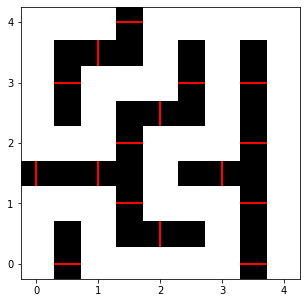

In [1]:
import matplotlib.pyplot as plt
from random import choice

# Constante et variables du programme
DIR = [(-1, 0), (1, 0), (0, -1), (0, 1)] # Directions possibles en x et y
larg = 5
haut = 5
# listes des points pour la construction du labyrinthe
coordx = []
coordy = []

def traiter_case(i, j):
    # Vérifie si la case est possible
    if 0 <= i < larg and 0 <= j < haut:
        return T[j][i] # nouvelle case 'False' ou case déjà visitée 'True'
    else:
        return True # bord du labyrinthe

def choisir_chemin(case):
    # Sélection des cases voisines
    i,j = case # case de départ
    if not traiter_case(i, j):
        T[j][i] = True
    L = []
    for a,b in DIR: # pour chaque case voisine
        if not traiter_case(i+a, j+b):
            L.append((i+a, j+b))
    return L

def construire_laby(case):
    # Obtenir recursivement les coordonnées de chaque point du labyrinthe
    L = choisir_chemin(case) # on récupère les voisins du point de départ
    if L == []:
        return
    else:
        sc = choice(L) # choix du point d'arrivée parmi les voisins
        coordx.append((case[0], sc[0])) # ajout des points de départ et d'arrivée dans les listes
        coordy.append((case[1], sc[1]))
        construire_laby(sc)
        construire_laby(case)

def tracer():
    # effectue le tracé du labyrinthe
    for i in range(len(coordx)):
        ax.plot([coordx[i][0],coordx[i][1]], [coordy[i][0],coordy[i][1]], 'w', lw=35)

# Programme principal
assert larg*haut <= 14400, "largeur X hauteur doit être < 7200" # limitation mémoire
T = [[False for j in range(larg)] for i in range(haut)] # cases à traiter
fig1 = plt.figure(figsize=(larg, haut))
ax = fig1.add_subplot(1,1,1)
ax.set_facecolor('black')
ax.set_xlim(-0.25, larg-1+0.25)
ax.set_ylim(-0.25, haut-1+0.25)
ax.grid(True, linestyle="-", color="red", lw="2")
ax.set_xticks([x for x in range(larg)])
ax.set_yticks([y for y in range(haut)])
debut = (0, 0) # départ du labyrinthe
construire_laby(debut)
tracer()
plt.show()

In [2]:
print(coordx)
print(coordy)

[(0, 0), (0, 1), (1, 1), (1, 2), (2, 3), (3, 3), (3, 2), (2, 2), (2, 3), (3, 3), (3, 3), (3, 4), (4, 4), (4, 4), (4, 4), (4, 4), (3, 2), (2, 2), (2, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1)]
[(0, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 4), (4, 4), (4, 3), (3, 2), (2, 1), (1, 0), (4, 4), (4, 3), (3, 3), (3, 2), (2, 2), (2, 3), (3, 4), (4, 4)]


<p>Réaliser la fonction <i>matriceConst()</i> qui prend comme paramètre une matrice ne comportant que des 0 et retourne la matrice de construction du labyrinthe.<br>On donne :</p>
<img src="../notebook/TNSI/labyrintheGif.gif" alt="construction de la matrice du labyrinthe">
<ol><li>Compléter la fonction suivante :</li></ol>

In [3]:
def construire_matrice(matrice):
    # Crée la matrice du labyrinthe à partir du tracé
    
    for x in range(len(coordx)):
        matrice[coordx[x][0]*2][coordy[x][0]*2]=1
        matrice[coordx[x][0]+coordx[x][1]][coordy[x][0]+coordy[x][1]]=1 #coordonnée intermédiaire
    
    return matrice
        
matrice = [[0 for j in range(2*larg-1)] for i in range(2*haut-1)]
matrice = construire_matrice(matrice)
print("Matrice de construction :")
for j in range(len(matrice)):
    for i in range(len(matrice[j])):
        if matrice[j][i] == 1:
            print('\033[91;1m',"1", end="  ") # code ANSI rouge, gras
        else:
            print('\033[0m',"0", end="  ") # RESET Color, Style
    print("\n")

Matrice de construction :
 1   1   1   0   1   1   1   1   1  

 0   0   1   0   1   0   0   0   1  

 1   1   1   0   1   1   1   0   0  

 1   0   0   0   0   0   1   0   0  

 1   0   1   1   1   0   1   1   1  

 1   0   1   0   1   0   0   0   1  

 1   1   1   0   1   1   1   1   1  

 0   0   0   0   0   0   0   0   1  

 0   1   1   1   1   1   1   1   1  



<p>Afin de vérifier votre matrice, nous utilisons la méthode <i>imshow()</i> de matplotlib.pyplot qui permet de visualiser une image. La matrice représente alors les pixels (0 : noir et 1 (255) : blanc) codés sur 8 bits. Nous affichons aussi les points de début et de fin du labyrinthe en gris clair 0.8 (204).</p>

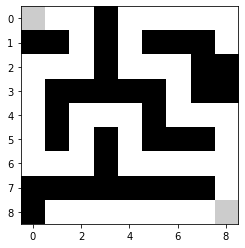

In [4]:
def afficher(mat):
    
    fig2 = plt.figure()
    ax = fig2.add_subplot(1,1,1)
    ax.imshow(mat, cmap='gray', vmin=0, vmax=1)
    plt.show()
    plt.close(fig2)

matrice[0][0] = 0.8 # point de début
matrice[2*haut-2][2*larg-2] = 0.8 # point de fin
afficher(matrice)